# Project: Investigate a Dataset - No Show Appointments

## Introduction

### Dataset Description 

This dataset was collected from a hundred thousand medical appointments in Brazil.
Various observations about each appointment were recorded.
This dataset focuses on whtehr or not the patients showed up for their scheduled appointments.

'PatientID' is the individual identifier for each patient.
'AppointmentID' is the identification number for each individual appointment scheduled.
'Gender' is the biolgical sex of the individual.
'ScheduledDay' is the day the patient scheduled the appointment.
'AppointmentDay' is the day the appointment is scheduled to take place.
'Age' is the age of the patient.
'Neighborhood' indicates the location of the hospital.
'Scholarship' is status of enrollment in the Brasilian welfare program.
'Hipertension' indicates whether or not the patient has a history of hypertension.
'Diabetes' indicates whether or not the patient has a history of diabetes.
'Alcoholism' indicates whether or not the patient has a history of alcoholism.
'Handcap' indicates whether or not the patient is handicapped.
'SMS_received' indicates if the patient was sent a text message reminder.
'No-show' indicated whether or not the patient was present for the appointment.


### Questions for Analysis

1. Is there any correlation between age and no-show appointments? 
  
  
2. What impact does being enrolled in the Brasilian welfare program (scholarship) have on the likelihood of patients showing up, if any?



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Upgrade pandas to use dataframe.explode() function. 

#!pip install --upgrade pandas==0.25.0

In [61]:
appt_df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [62]:
appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
appt_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [64]:
appt_df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
50067,8.751954e+14,5593258,F,2016-04-18T09:03:30Z,2016-05-16T00:00:00Z,78,JARDIM DA PENHA,0,1,0,0,0,0,No
90770,1.732594e+14,5752605,F,2016-05-31T12:03:15Z,2016-06-02T00:00:00Z,53,SÃO PEDRO,0,1,1,0,0,0,No
6850,8.268381e+12,5676893,F,2016-05-09T16:48:31Z,2016-05-11T00:00:00Z,59,ROMÃO,1,1,0,0,0,0,Yes
20701,6.644897e+11,5667386,F,2016-05-06T07:43:26Z,2016-05-06T00:00:00Z,30,FORTE SÃO JOÃO,0,0,0,0,1,0,No
107291,9.948678e+12,5560837,F,2016-04-08T09:38:27Z,2016-06-07T00:00:00Z,83,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
90158,1.379524e+14,5770017,F,2016-06-03T09:36:30Z,2016-06-03T00:00:00Z,8,BONFIM,0,0,0,0,0,0,No
22200,5.218769e+13,5688923,F,2016-05-12T07:49:28Z,2016-05-12T00:00:00Z,28,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No
9400,8.691846e+11,5647971,F,2016-05-02T14:47:57Z,2016-05-03T00:00:00Z,56,MARUÍPE,0,0,0,0,0,0,No
34472,9.199117e+13,5603624,F,2016-04-20T07:13:54Z,2016-05-02T00:00:00Z,54,TABUAZEIRO,1,1,0,0,0,1,No
94366,4.696543e+13,5777995,F,2016-06-06T14:51:44Z,2016-06-06T00:00:00Z,56,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No


In [65]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [66]:
appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The AppointmentID values are ints and should be strings. ScheduledDay and AppointmentDay should both be in datetime format instead of strings. Column names have typos, inconsistant capitilization, and inconsistant formatting. All yes or no columns, such as Alcoholism, SMS_recieved, and No-show, should be bolleans, instead of ints and strings.

In [67]:
appt_df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age','neighbourhood', 
                   'bolsa_familia', 'hypertension', 'diabetes', 'alcoholism', 'handicapped', 'received_sms', 'arrival_status']

In [68]:
appt_df['appointment_id'] = appt_df['appointment_id'].astype(str)

In [69]:
appt_df['scheduled_day'] = pd.to_datetime(appt_df.scheduled_day)

In [70]:
appt_df['appointment_day'] = pd.to_datetime(appt_df.appointment_day)

In [71]:
appt_df['bolsa_familia'] = appt_df['bolsa_familia'].astype(str)
appt_df['bolsa_familia'] = appt_df['bolsa_familia'].apply(lambda x: 'Enrolled' if x == '1' else 'Not Enrolled')

In [72]:
appt_df['hypertension'] = appt_df['hypertension'].astype(str)
appt_df['hypertension'] = appt_df['hypertension'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [73]:
appt_df['diabetes'] = appt_df['diabetes'].astype(str)
appt_df['diabetes'] = appt_df['diabetes'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [74]:
appt_df['alcoholism'] = appt_df['alcoholism'].astype(str)
appt_df['alcoholism'] = appt_df['alcoholism'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [75]:
appt_df['handicapped'] = appt_df['handicapped'].astype(str)
appt_df['handicapped'] = appt_df['handicapped'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [76]:
appt_df['received_sms'] = appt_df['received_sms'].astype(str)
appt_df['received_sms'] = appt_df['received_sms'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [77]:
appt_df['arrival_status'] = appt_df['arrival_status'].astype(str)
appt_df['arrival_status'] = appt_df['arrival_status'].apply(lambda x: 'Did Not Arrive' if x == 'Yes' else 'Arrived')

In [78]:
appt_df.sample(5)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,bolsa_familia,hypertension,diabetes,alcoholism,handicapped,received_sms,arrival_status
105307,6.644556e+14,5782128,F,2016-06-07 10:37:30+00:00,2016-06-07 00:00:00+00:00,2,BELA VISTA,Not Enrolled,No,No,No,No,No,Did Not Arrive
76382,3.561214e+11,5681459,M,2016-05-10 14:26:26+00:00,2016-05-10 00:00:00+00:00,1,SANTA MARTHA,Not Enrolled,No,No,No,No,No,Arrived
102637,4.173272e+13,5767116,F,2016-06-02 16:33:45+00:00,2016-06-07 00:00:00+00:00,53,SANTO ANTÔNIO,Not Enrolled,Yes,No,No,No,Yes,Arrived
95208,4.962546e+13,5784396,M,2016-06-07 15:47:08+00:00,2016-06-07 00:00:00+00:00,16,GRANDE VITÓRIA,Not Enrolled,No,No,No,No,No,Arrived
93091,5.363974e+14,5662922,F,2016-05-05 09:13:37+00:00,2016-06-01 00:00:00+00:00,52,FONTE GRANDE,Not Enrolled,Yes,No,No,No,No,Arrived


## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

### Is there any correlation between age and no-show appointments? 

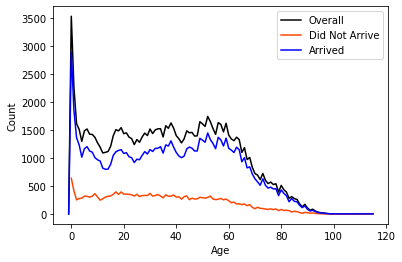

arrival_status,Arrived,Did Not Arrive,Overall,Percent Arrived
age,,,,
-1,1.0,0.0,1.0,100.00
0,2900.0,639.0,3539.0,81.94
1,1858.0,415.0,2273.0,81.74
2,1366.0,252.0,1618.0,84.43
3,1236.0,277.0,1513.0,81.69
...,...,...,...,...
98,5.0,1.0,6.0,83.33
99,1.0,0.0,1.0,100.00
100,4.0,0.0,4.0,100.00


In [104]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Count the number of occurrences of each age where 'no_show' == 'No'
age_no_show_counts_no = appt_df[appt_df['arrival_status'] == 'Arrived'].groupby('age')['arrival_status'].count()

# Count the number of occurrences of each age where 'no_show' == 'Yes'
age_no_show_counts_yes = appt_df[appt_df['arrival_status'] == 'Did Not Arrive'].groupby('age')['arrival_status'].count()

age_no_show_overall = appt_df.groupby('age')['arrival_status'].count()

age_grouped = appt_df.groupby(['age', 'arrival_status']).size().reset_index(name = 'counts')

age_pivot = age_grouped.pivot(index = 'age', columns = 'arrival_status', values = 'counts')

age_pivot['Arrived'].fillna(0, inplace=True)

age_pivot['Did Not Arrive'].fillna(0, inplace=True)

age_pivot['Overall'] = age_pivot['Arrived'] + age_pivot['Did Not Arrive']

# Plot the counts of each age
plt.plot(age_no_show_overall, label = 'Overall', color = 'black')
plt.plot(age_no_show_counts_yes.index, age_no_show_counts_yes.values, label = 'Did Not Arrive', color = 'orangered')
plt.plot(age_no_show_counts_no.index, age_no_show_counts_no.values, label='Arrived', color = 'blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

age_pivot['Percent Arrived'] = round((age_pivot['Arrived'] / age_pivot['Overall']) * 100, 2)

age_pivot['Percent Arrived'].fillna(100, inplace=True)

age_pivot


### What impact does being enrolled in the Brasilian welfare program have on the likelihood of patients showing up, if any?

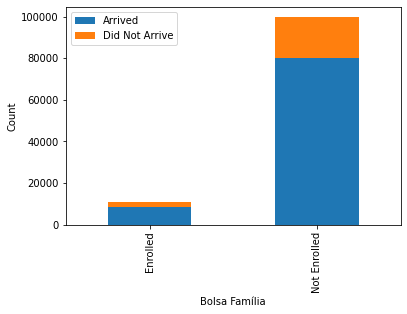

arrival_status,Arrived,Did Not Arrive,Percent Arrived
bolsa_familia,,,
Enrolled,8283,2578,76.26
Not Enrolled,79925,19741,80.19


In [87]:
# Group the data by 'scholarship' and 'no_show' and count the occurrences of each combination
bf_grouped = appt_df.groupby(['bolsa_familia', 'arrival_status']).size().reset_index(name = 'counts')

# Pivot the grouped data to create a table where each row represents a 'scholarship' value and each column represents a 'no_show' value
bf_pivot = bf_grouped.pivot(index = 'bolsa_familia', columns = 'arrival_status', values = 'counts')

# Plot the pivot table as a stacked bar plot
bf_pivot.plot(kind = 'bar', stacked = True)
plt.xlabel('Bolsa Família')
plt.ylabel('Count')
plt.legend(['Arrived', 'Did Not Arrive'], loc = 'upper left')
plt.show()

bf_pivot['Percent Arrived'] = round((bf_pivot['Arrived'] / (bf_pivot['Did Not Arrive'] + bf_pivot['Arrived'])) * 100, 2)

bf_pivot


## Conclusions

##### Question 1: Is there any correlation between age and no-show appointments? 

There is only a weak correlation between age and the likelihood that any one individual will show up for their appointment. The only real noteworthy variation in this is around 40 to 60 years old. However, this is still a negligible correlation. Although, the strongest correlation is with age and number of appointments overall. The number of overall scheduled appointments rises in early adulthood and begins to taper off towards ages of 60 and older.

##### Question 2: What correlation exists between being enrolled in the Brasilian welfare program and no-show appointments?

I have discovered through my analysis that the percentage of both enrolled and unenrolled individuals relative to their likelihood of showing up for their appointments is very similar. This leads me to believe that the Brasilian welfare program does not have a significant impact on the likelihood of patients showing up for their appointments. However, I have also observed here that the overall number of appointments scheduled for individuals enrolled in the Brasilian welfare program is significantly lower than the number of appointments scheduled for individuals not enrolled in the Brasilian welfare program. This could be due to the fact that the Brasilian welfare program is either not as widely known or utilized as it could be.

##### Limitations

The biggest limitation of this dataset is that a large number of outside factors are not documented. Thus leaving many takeaways based laregly on conjecture as opposed to statistical analysis. I feel that for the analysis to more accurate and informative other datasets would need to be utilised, such as census data, to provide a more complete picture of the population of patients, and perhaps a more complete understanding of the Brasilian welfare program to understand its reach and impact on the population. Without more information, it is difficult to draw any definitive conclusions from this dataset that could actually be impactful.

## OPTIONAL: Question for the reviewer

**Why did I need the update pandas line? I actually needed to comment it out when I was working on it on my local machine.**
**I would also like to request feedback on my choices for visualizations. I am not sure if I chose the best ones.**

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1